<a href="https://colab.research.google.com/github/nightitachi/New-Plant-Diseases-Dataset/blob/main/New_Plant_Diseases_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install opendatasets


In [15]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Skipping, found downloaded files in "./new-plant-diseases-dataset" (use force=True to force download)


#importing Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Loading Dataset

In [17]:
train_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

# PreProcessing Dataset

In [18]:

train_set = keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [19]:
validation_set = keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [20]:
for x,y in train_set:
  print(x , x.shape)
  print(y,y.shape)


Streaming output truncated to the last 5000 lines.
   [131. 126. 146.]
   [134. 129. 149.]
   ...
   [116. 110. 124.]
   [ 68.  62.  76.]
   [ 92.  86. 100.]]]


 [[[219. 209. 199.]
   [224. 214. 204.]
   [221. 211. 201.]
   ...
   [174. 157. 141.]
   [171. 154. 138.]
   [168. 151. 135.]]

  [[223. 213. 203.]
   [224. 214. 204.]
   [225. 215. 205.]
   ...
   [173. 156. 140.]
   [171. 154. 138.]
   [169. 152. 136.]]

  [[223. 213. 203.]
   [214. 204. 194.]
   [213. 203. 193.]
   ...
   [165. 148. 132.]
   [164. 147. 131.]
   [164. 147. 131.]]

  ...

  [[137. 114. 100.]
   [158. 135. 121.]
   [145. 122. 108.]
   ...
   [136. 112. 102.]
   [135. 111. 101.]
   [130. 106.  96.]]

  [[149. 126. 112.]
   [161. 138. 124.]
   [169. 146. 132.]
   ...
   [137. 113. 103.]
   [138. 114. 104.]
   [141. 117. 107.]]

  [[152. 129. 115.]
   [130. 107.  93.]
   [151. 128. 114.]
   ...
   [125. 101.  91.]
   [118.  94.  84.]
   [118.  94.  84.]]]


 ...


 [[[  1.   1.   1.]
   [  1.   1.   1.]
   [  1.

# Building The Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Dense , MaxPool2D , Flatten , Dropout

In [22]:
model = Sequential()

In [23]:


model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(38, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer=Adam(learning_rate=0.0001) ,loss='categorical_crossentropy' , metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 127, 127, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      27,649,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,418,762 (123.67 MB)

 Trainable params: 32,418,762 (123.67 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
training_history = model.fit(x=train_set, validation_data=validation_set, epochs=3)


Epoch 1/3
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 617s 268ms/step - accuracy: 0.5030 - loss: 1.7593 - val_accuracy: 0.9074 - val_loss: 0.2996
Epoch 2/3
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 584s 262ms/step - accuracy: 0.8795 - loss: 0.3798 - val_accuracy: 0.9706 - val_loss: 0.0990
Epoch 3/3
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 622s 262ms/step - accuracy: 0.9327 - loss: 0.2071 - val_accuracy: 0.9660 - val_loss: 0.1063


# Model Evaluation



In [27]:
train_loss , train_acc = model.evaluate(train_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 107s 49ms/step - accuracy: 0.9612 - loss: 0.1194


In [28]:
valid_loss , valid_acc =model.evaluate(validation_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 108s 49ms/step - accuracy: 0.9668 - loss: 0.1049


# Accuracy Visualizarion

In [29]:
training_history.history

{'accuracy': [0.6912867426872253, 0.8978305459022522, 0.9384451508522034],
 'loss': [1.0443552732467651, 0.32372698187828064, 0.1905156970024109],
 'val_accuracy': [0.9074044823646545, 0.9705526828765869, 0.9660146236419678],
 'val_loss': [0.2996252477169037, 0.09897512942552567, 0.10632815957069397]}

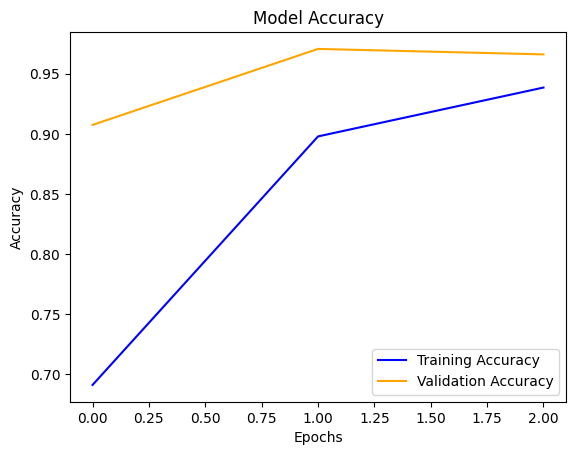

In [30]:
epochs= [i for i in range(1,4)]
plt.plot(training_history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss visualization

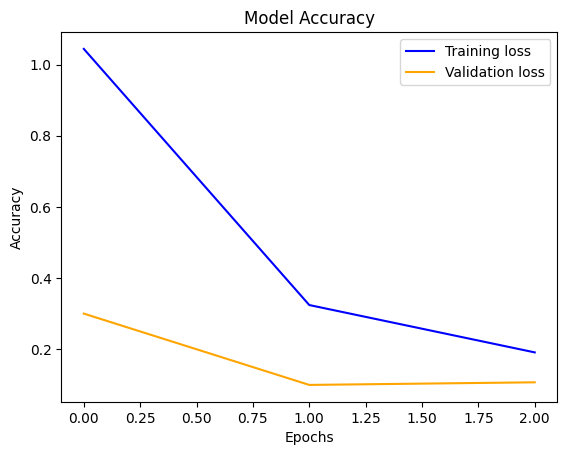

In [31]:
epochs= [i for i in range(1,4)]

plt.plot(training_history.history['loss'], label='Training loss', color='blue')
plt.plot(training_history.history['val_loss'], label='Validation loss', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Saving Model

In [32]:
model.save("trained_model.keras")

# Saving history

In [33]:
import json
with open('train_hist.json', 'w') as f:
    json.dump(training_history.history, f)



In [34]:
class_names = validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

# Prediction Test set

In [35]:
test_dir = '/content/new-plant-diseases-dataset/test/test'

In [36]:
test_set = keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


# Prediction

In [37]:
y_pred = model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step


In [38]:
y_pred , y_pred.shape

(array([[9.98649061e-01, 1.67247235e-05, 3.82286771e-06, ...,
         1.10193215e-08, 2.00775254e-08, 4.20564517e-09],
        [9.99547303e-01, 5.90711988e-06, 2.17006368e-06, ...,
         7.24334992e-09, 1.78531110e-08, 1.61078511e-08],
        [9.99977231e-01, 7.06715255e-08, 5.22433936e-07, ...,
         1.31145043e-11, 9.24375160e-11, 5.07407560e-10],
        ...,
        [4.96764463e-10, 4.97554276e-10, 2.00996979e-08, ...,
         7.78635556e-09, 2.22645413e-09, 9.99969244e-01],
        [5.89051963e-09, 4.59368721e-09, 6.23223428e-09, ...,
         9.33024413e-09, 1.14081899e-09, 9.99756753e-01],
        [2.09873934e-13, 1.23345759e-14, 7.76444000e-14, ...,
         3.45501792e-14, 4.67188961e-12, 9.99997139e-01]], dtype=float32),
 (17572, 38))

In [39]:
prediction_categories = tf.argmax(y_pred , axis=1)
prediction_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [40]:
true_categories = tf.concat([y for x,y in test_set] , axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [41]:
y_true=tf.argmax(true_categories , axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

# Confusion Matrix

In [42]:
from sklearn.metrics import classification_report , confusion_matrix

report = classification_report(y_true, prediction_categories, target_names=class_names)
print(report)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.87      0.91       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.87      0.98      0.92       440
                                   Apple___healthy       0.82      0.98      0.89       502
                               Blueberry___healthy       0.97      0.96      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.96      0.96       421
                 Cherry_(including_sour)___healthy       0.95      0.93      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.93      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.94      0.

In [43]:
cm = confusion_matrix(prediction_categories , y_true )
cm


array([[440,   1,   0, ...,   0,   0,   0],
       [  3, 482,   0, ...,   0,   0,   0],
       [  4,   1, 430, ...,   3,   0,   1],
       ...,
       [  0,   0,   0, ..., 479,   0,   0],
       [  0,   0,   0, ...,   0, 439,   0],
       [  0,   0,   3, ...,   0,   0, 471]])

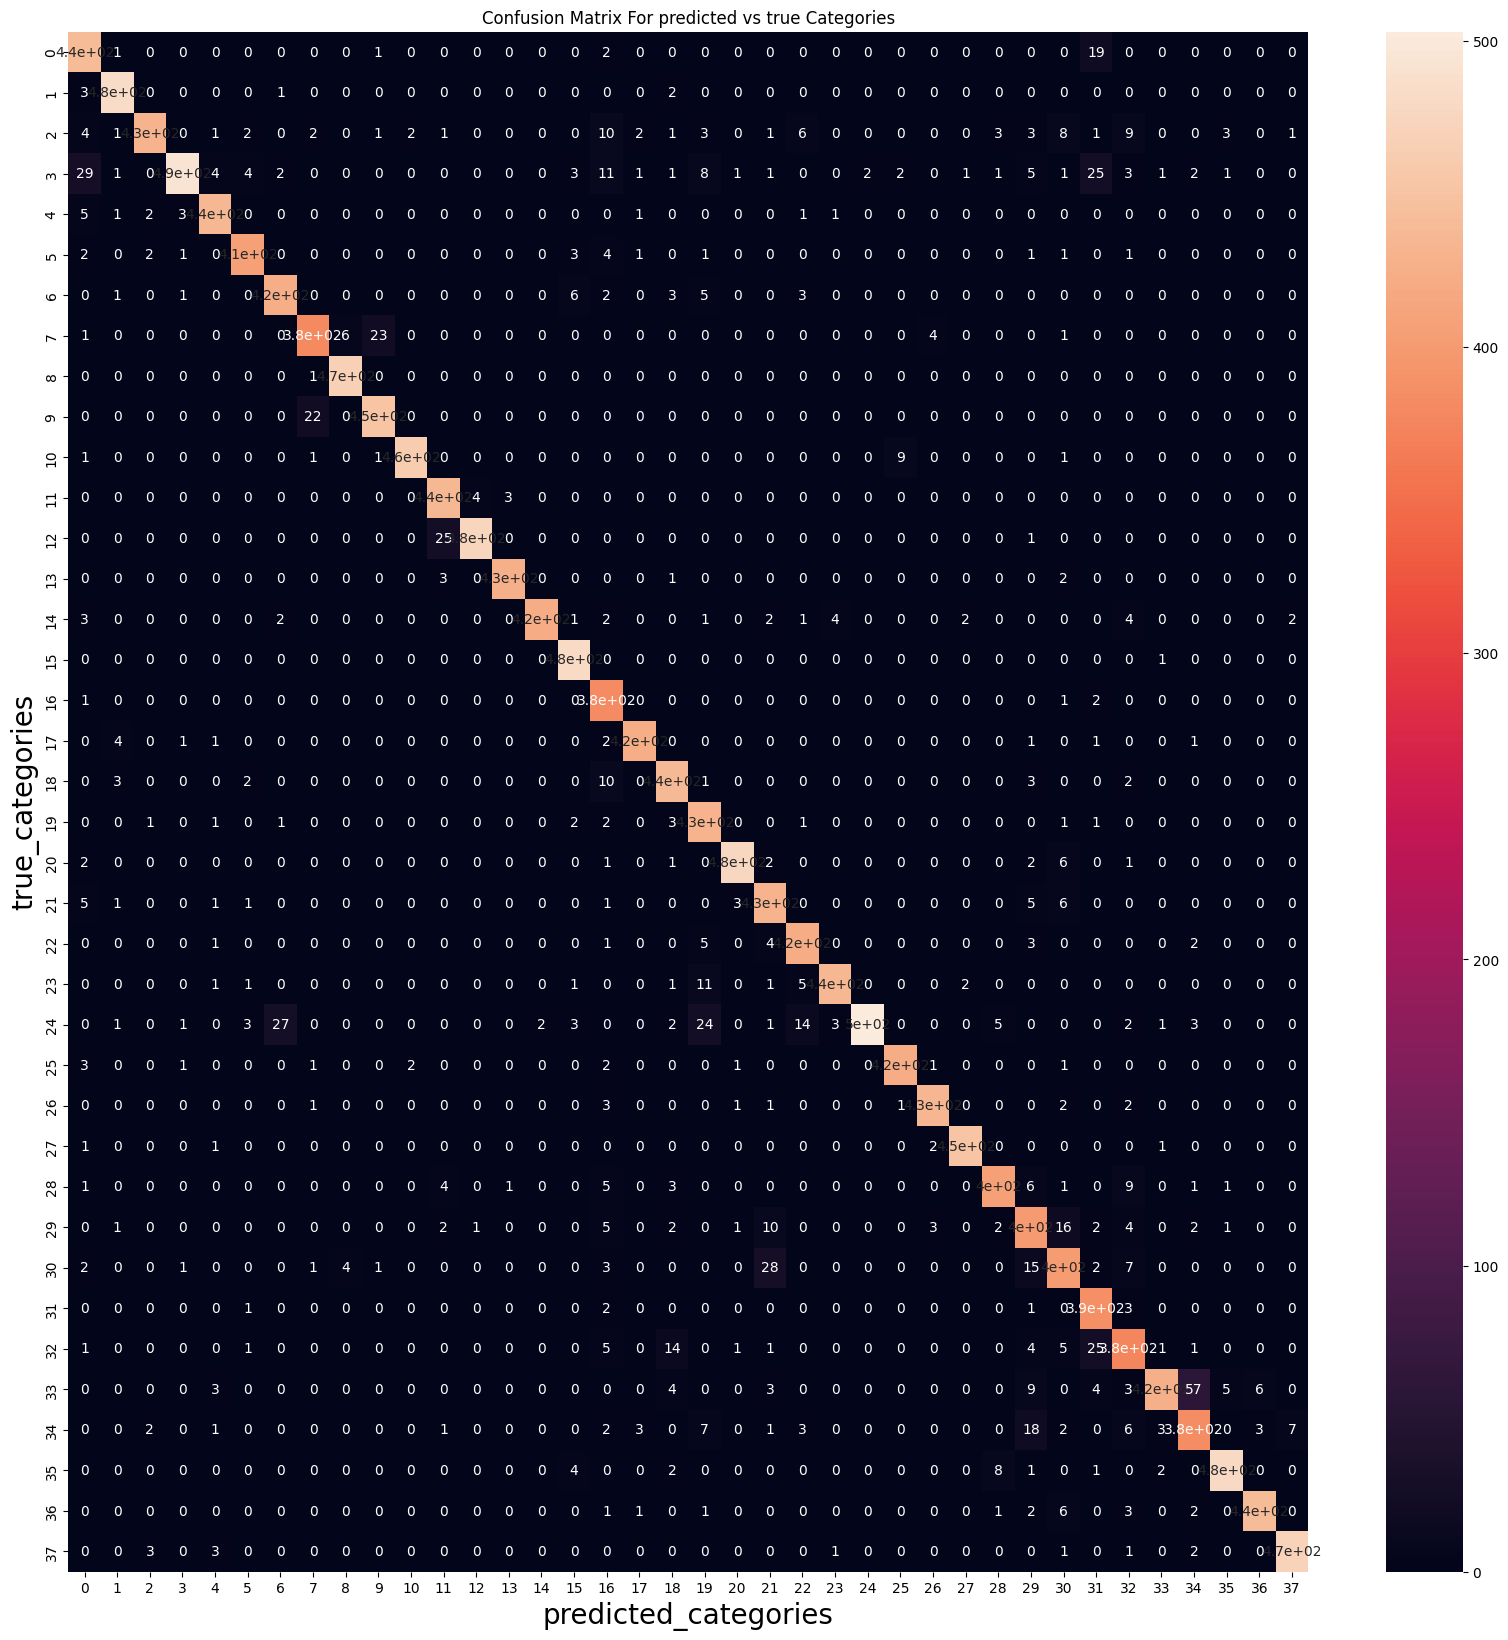

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(cm , annot=True , annot_kws={'size':10})
plt.title('Confusion Matrix For predicted vs true Categories')
plt.xlabel('predicted_categories' , fontsize=20)
plt.ylabel('true_categories', fontsize=20)
plt.show()

# Predict Image

In [47]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/trained_model.keras')


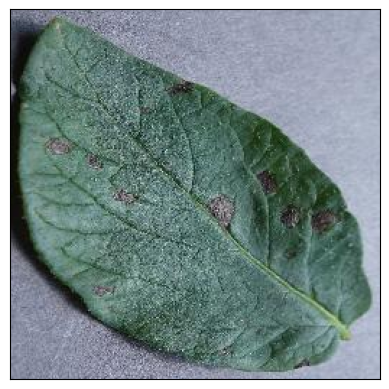

In [76]:
import cv2
image_path = '/content/new-plant-diseases-dataset/test/test/PotatoEarlyBlight3.JPG'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

array([[[ 94,  97, 114],
        [123, 126, 143],
        [129, 132, 149],
        ...,
        [161, 169, 188],
        [163, 171, 190],
        [165, 173, 192]],

       [[116, 119, 136],
        [105, 108, 125],
        [115, 118, 135],
        ...,
        [168, 176, 195],
        [167, 175, 194],
        [166, 174, 193]],

       [[109, 112, 129],
        [ 98, 101, 118],
        [142, 145, 162],
        ...,
        [166, 174, 193],
        [162, 170, 189],
        [160, 168, 187]],

       ...,

       [[144, 149, 169],
        [138, 143, 163],
        [136, 141, 161],
        ...,
        [176, 184, 203],
        [178, 186, 205],
        [180, 188, 207]],

       [[136, 141, 161],
        [125, 130, 150],
        [131, 136, 156],
        ...,
        [179, 187, 206],
        [178, 186, 205],
        [178, 186, 205]],

       [[124, 129, 149],
        [114, 119, 139],
        [129, 134, 154],
        ...,
        [173, 181, 200],
        [171, 179, 198],
        [169, 177, 196]]], dtype=uint8)
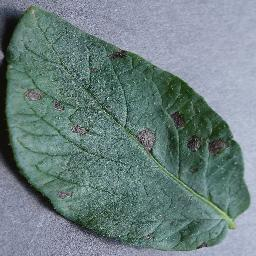

In [77]:
img_array = np.array(img)
img_array

In [78]:
image = tf.keras.utils.load_img(image_path, target_size=(256, 256))
image_array = tf.keras.utils.img_to_array(image)
image_array = np.array(image_array)
print(image_array)

[[[ 94.  97. 114.]
  [123. 126. 143.]
  [129. 132. 149.]
  ...
  [161. 169. 188.]
  [163. 171. 190.]
  [165. 173. 192.]]

 [[116. 119. 136.]
  [105. 108. 125.]
  [115. 118. 135.]
  ...
  [168. 176. 195.]
  [167. 175. 194.]
  [166. 174. 193.]]

 [[109. 112. 129.]
  [ 98. 101. 118.]
  [142. 145. 162.]
  ...
  [166. 174. 193.]
  [162. 170. 189.]
  [160. 168. 187.]]

 ...

 [[144. 149. 169.]
  [138. 143. 163.]
  [136. 141. 161.]
  ...
  [176. 184. 203.]
  [178. 186. 205.]
  [180. 188. 207.]]

 [[136. 141. 161.]
  [125. 130. 150.]
  [131. 136. 156.]
  ...
  [179. 187. 206.]
  [178. 186. 205.]
  [178. 186. 205.]]

 [[124. 129. 149.]
  [114. 119. 139.]
  [129. 134. 154.]
  ...
  [173. 181. 200.]
  [171. 179. 198.]
  [169. 177. 196.]]]


In [79]:
image = tf.keras.utils.load_img(image_path, target_size=(256, 256))
image_array = tf.keras.utils.img_to_array(image)
image_array = image_array / 255.0
image_array = np.expand_dims(image_array, axis=0)

image_array = image_array.astype('float32')

prediction = model.predict(image_array)

print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.02540491 0.02126881 0.04101043 0.03326345 0.03019442 0.0349927
  0.02210341 0.02744652 0.02199879 0.02816608 0.03053639 0.0197248
  0.02024542 0.02156783 0.01981298 0.02608702 0.02853309 0.02907926
  0.02013182 0.02982991 0.01826001 0.02191649 0.02763569 0.02489154
  0.02905828 0.02776318 0.02615756 0.01960689 0.02879492 0.02585984
  0.03641644 0.02152697 0.02018256 0.02226094 0.03128029 0.02673385
  0.0260012  0.0342553 ]]


In [80]:
class_names = validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [81]:
prediction = np.argmax(prediction)
prediction

2

In [82]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [83]:
final_result= class_name[prediction]
final_result

'Apple___Cedar_apple_rust'

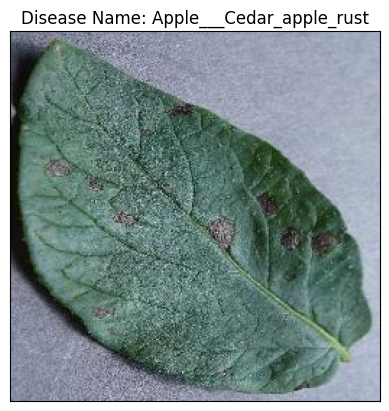

In [84]:
image_path = '/content/new-plant-diseases-dataset/test/test/PotatoEarlyBlight3.JPG'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f'Disease Name: {final_result}')
plt.xticks([])
plt.yticks([])
plt.show()